In [177]:
! pip install plotnine[all]
! pip install bioinfokit

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

# Datasets

Life expectancy at birth [years]

```
https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv
```



In [185]:
# Data preparation
pd.set_option('display.max_rows', None)
data=pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv")

country=pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--entities--geo.csv")

data1=pd.merge(data, country, on="geo") # left merge two datasets by a key ['geo']
data1.head(20)

region=pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--open_numbers--world_development_indicators/master/ddf--entities--geo--country.csv")
region['country'] = region['country'].str.strip() # trim trailing or heading space in columns
region.rename({"country":"geo"}, axis=1, inplace=True) # rename the column name
region['un_sdg_region'] = region['un_sdg_region'].str.strip()
region.head(20)

data2=pd.merge(data1, region, on=['geo']) # left merge two datasets. Other countries with four letters and more in country code 
# are not included.
data2.head(5)

# Calculate mean by grouping the dataset by regions
data3=data2[(data2.time >= 1900) & (data2.time <= 2020)].sort_values(by=['un_sdg_region']) # filter years & sort by region
expectancy=pd.DataFrame(data3.groupby('un_sdg_region')['life_expectancy_at_birth'].mean()).reset_index() # group by region 
# & calculate mean
print(expectancy)

                              un_sdg_region  life_expectancy_at_birth
0              un_australia_and_new_zealand                 69.070372
1              un_central_and_southern_asia                 48.635313
2         un_eastern_and_south_eastern_asia                 52.270542
3            un_europe_and_northern_america                 63.456244
4        un_latin_america_and_the_caribbean                 55.503942
5       un_northern_africa_and_western_asia                 53.662297
6  un_oceania_exc_australia_and_new_zealand                 51.615625
7                     un_sub_saharan_africa                 46.062352


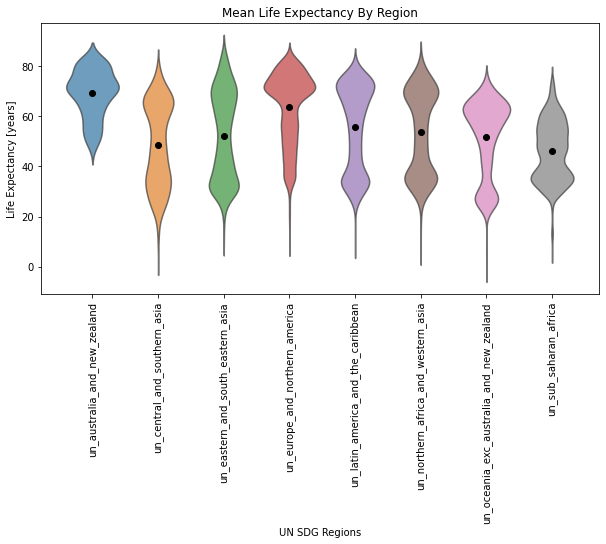

In [180]:
## TASK 1

# Plot the mean life-expectancy in each region from 1900 until 2020

# Plot the mean
x=data3.un_sdg_region # specify x, y axis
y=data3.life_expectancy_at_birth

x1=expectancy.un_sdg_region 
y1=expectancy.life_expectancy_at_birth # plot mean expectancy per region

fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x=x, y=y, data=data3, inner=None) # plot data distribution
plt.setp(ax.collections, alpha=.7) # define transparency of a violin plot
plt.scatter(x=range(len(y1)),y=y1,c="k", label='mean') # plot mean per region
plt.xticks(rotation=90) # rotate long labels for readability
plt.title("Mean Life Expectancy By Region")
plt.ylabel("Life Expectancy [years]")
plt.xlabel("UN SDG Regions")
plt.show()

C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


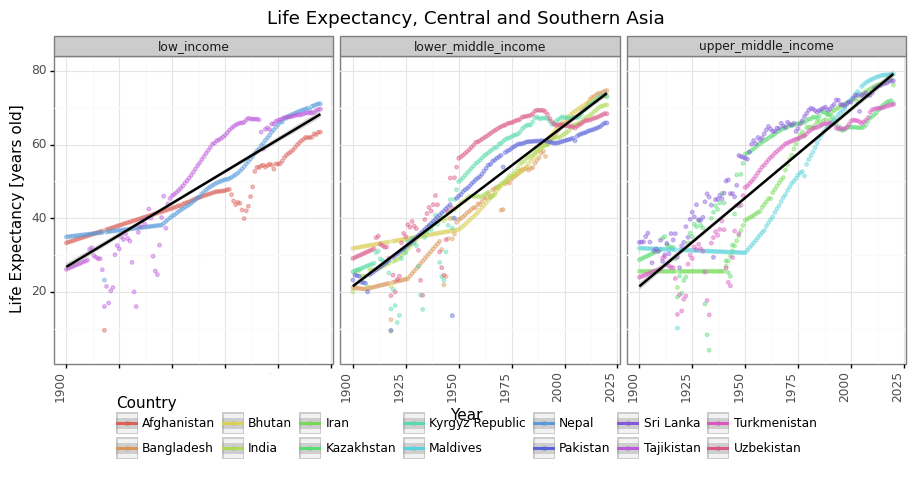

<ggplot: (169476682689)>

In [238]:
# Pick a region and plot the life-expectancy of all the countries in that region from 1900 to 2020.

# Select a region
selected=data3[(data3.un_sdg_region == 'un_central_and_southern_asia')].sort_values(by=['name_x'])

# Plot life expectancy
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1)) # plot vertical labels for x axis
ggplot(selected, aes(x='time', y='life_expectancy_at_birth', color='name_x', group='income_groups')) + theme_bw() +\
    geom_point(size=1, alpha=0.4)+ geom_smooth(method="lm", level=0.90, se=True) + \
    facet_wrap(['income_groups']) + flip_xlabels+ theme(figure_size = (11, 4), legend_position="bottom")+ \
    labs(color='Country', y='Life Expectancy [years old]', x='Year', title='Life Expectancy, Central and Southern Asia')+ \
    guides(colour=guide_legend(nrow=2, override_aes={"size": 1.2}))

In [187]:
# Find and plot life expectancy 1900-2020 of the 5 countries that have the highest and lowest mean life expectancy.

expectancy1=pd.DataFrame(data3.groupby('name_x')['life_expectancy_at_birth'].mean()).sort_values(['life_expectancy_at_birth']).reset_index() 
# group by country, calculate mean & sort by life expectancy

high=expectancy1.head(5) # select five countries with max. expectancy
low=expectancy1.tail(5) # select five countries with min. expectancy
frames = [low, high]
selected1 = pd.concat(frames) # concatenate two datasets

# Filter selected countries in the big dataset with years
years=data2[(data2.time >= 1990) & (data2.time <= 2020)]
top_down=years[(years.name_x=='Norway') | (years.name_x=='San Marino') | (years.name_x=='Sweden') | 
               (years.name_x=='San Marino') | (years.name_x=='Monaco') | (years.name_x=='Andorra') | 
               (years.name_x=='Guinea-Bissau') | (years.name_x=='Ethiopia') |
               (years.name_x=='Rwanda') | (years.name_x=='Mali') | (years.name_x=='Malawi')]

selected1.sort_values('life_expectancy_at_birth')

,name_x,life_expectancy_at_birth
0,Guinea-Bissau,39.427769
1,Malawi,39.696529
2,Ethiopia,40.321818
3,Rwanda,41.059752
4,Mali,41.201653
190,Norway,70.719669
191,Sweden,70.860744
192,Monaco,75.712714
193,San Marino,77.612000
194,Andorra,78.669286


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


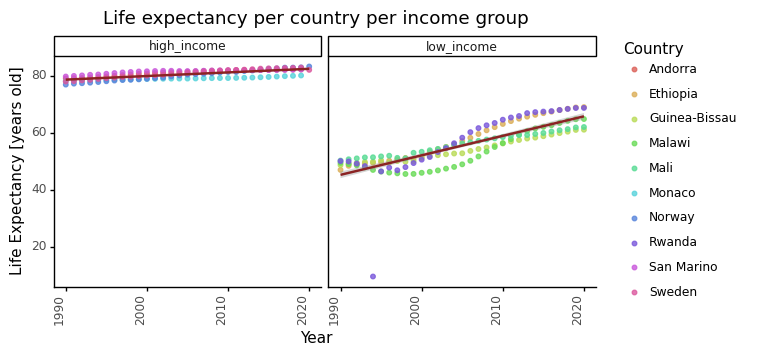

<ggplot: (169475902546)>

In [188]:
# Plot trends in life expectancy per country per income group

ggplot(top_down, aes(x='time', y='life_expectancy_at_birth', color='name_x', group='income_groups')) + theme_classic() +\
    geom_point(size=1.4, alpha=0.8)+ geom_smooth(method="lm", level=0.90, se=True, color='#8B2323') + \
    facet_wrap(['income_groups']) + flip_xlabels+ theme(figure_size = (7, 3))+labs(color='Country', 
    y='Life Expectancy [years old]', x='Year', title='Life expectancy per country per income group')

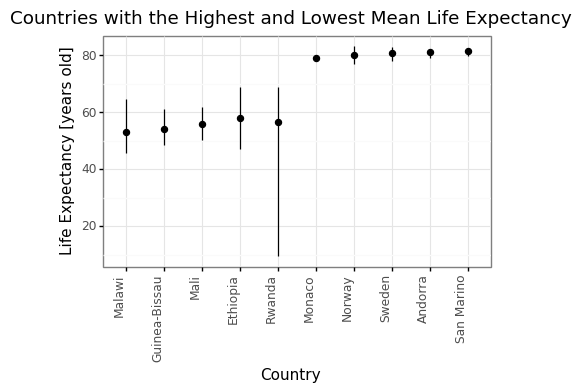

<ggplot: (169475661511)>

In [189]:
# Plot mean life expectancy per country
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1)) # plot vertical labels for x axis

ggplot(top_down) +\
    stat_summary(aes(x='reorder(name_x, life_expectancy_at_birth)', y='life_expectancy_at_birth'), 
                 fun_ymin=np.min, fun_ymax=np.max, fun_y=np.mean, show_legend=False) + \
    theme_bw() + flip_xlabels + labs(color='Country', y='Life Expectancy [years old]', x='Country', 
                                     title='Countries with the Highest and Lowest Mean Life Expectancy') + \
    theme(figure_size = (5, 3))

In [191]:
# Which factors contribute to life-expectancy? Which of the following factors significantly contribute to 2000-2020 mean 
# life expectancy?

# Landlocked vs coastline
# Being a high-upper/middle income country vs lower/middle-low income country
# Being in the Northern emisphere vs Southern emisphere
# Longitude
# Being a christian country vs a country of other religions
# Being a UN state or not

# Select variables for testing
test_data=data3[['life_expectancy_at_birth', 'income_groups', 'landlocked', 'longitude', 'main_religion_2008', 'un_state']]

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state',
            data=test_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3) # type=3 for ANOVA with unbalanced samples per group
print(anova_table)

# income & religion significantly affect life expectancy (p=0.0000 and p=1.592125e-17 respectively at significance level 0.05).

# Perform multiple pairwise comparison (Tukey HSD). In case of unequal sample size data, tukey_hsd uses Tukey-Kramer test
from bioinfokit.analys import stat
res = stat()

# for main effect 'income'
res.tukey_hsd(df=test_data, res_var='life_expectancy_at_birth', xfac_var='income_groups', 
              anova_model='life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state')
print(res.tukey_summary) # all levels of factor 'income' significantly differ in pairwise comparison

# for main effect 'religion'
res.tukey_hsd(df=test_data, res_var='life_expectancy_at_birth', xfac_var='main_religion_2008', 
              anova_model='life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state')
print(res.tukey_summary) # all levels of factor 'religion' significantly differ in pairwise comparison. 
# Results from Tukey’s HSD suggests that all pairwise comparisons for independend categorical variables rejects null hypothesis
# (p < 0.05) and indicates statistical significant differences.

                          sum_sq       df            F        PR(>F)
Intercept           7.875266e+05      1.0  3558.594912  0.000000e+00
income_groups       7.165152e+05      3.0  1079.238539  0.000000e+00
landlocked          5.675044e+01      1.0     0.256438  6.125832e-01
main_religion_2008  1.715094e+04      2.0    38.749968  1.592125e-17
un_state            2.346609e+02      1.0     1.060362  3.031446e-01
longitude           6.026846e+02      1.0     2.723349  9.890521e-02
Residual            4.662848e+06  21070.0          NaN           NaN


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


                group1               group2       Diff      Lower      Upper  \
0          high_income  upper_middle_income   8.348149   7.680033   9.016265   
1          high_income           low_income  18.394441  17.517689  19.271192   
2          high_income  lower_middle_income  14.528503  13.825429  15.231578   
3  upper_middle_income           low_income  10.046292   9.165835  10.926749   
4  upper_middle_income  lower_middle_income   6.180354   5.472665   6.888044   
5           low_income  lower_middle_income   3.865937   2.958667   4.773208   

     q-value  p-value  
0  45.399933    0.001  
1  76.230163    0.001  
2  75.082114    0.001  
3  41.458568    0.001  
4  31.731246    0.001  
5  15.482278    0.001  


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


              group1             group2      Diff     Lower     Upper  \
0          christian  eastern_religions  3.957237  3.060068  4.854406   
1          christian             muslim  6.541559  5.984335  7.098783   
2  eastern_religions             muslim  2.584323  1.614281  3.554364   

     q-value  p-value  
0  14.620652    0.001  
1  38.913507    0.001  
2   8.830907    0.001  


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.


0.962083101272583 0.0


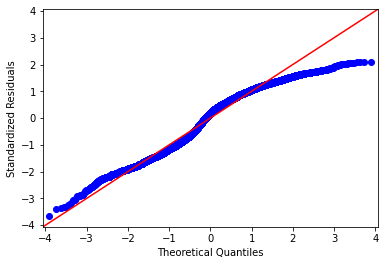

                 Parameter     Value
0      Test statistics (T)  525.7879
1  Degrees of freedom (Df)   11.0000
2                  p value    0.0000


In [159]:
# Check assumptions of ANOVA

# Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test)
# homoscedasticity or homogeneity of variances (variances are equal between treatment groups) (Barlett test)
# Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
# The dependent variable should be continuous. 

# check normality of residuals with the Shapiro-Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue) # residuals are normally distributed

sm.qqplot(res.anova_std_residuals, line='45') # plot residuals
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Check for homogeneity of variance with the Barlett test
res = stat()
res.bartlett(df=test_data, res_var='life_expectancy_at_birth', xfac_var=['income_groups', 'main_religion_2008'])
print(res.bartlett_summary) # homogeneous variance

In [192]:
# What is the contribution of these factors to mean life expectancy in 1900-1920?
new=data2[(data2.time >= 1900) & (data2.time <= 1920)]

# Select variables for testing
test_new=new[['life_expectancy_at_birth', 'income_groups', 'landlocked', 'longitude', 'main_religion_2008', 'un_state']]

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_new = ols('life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state',
            data=test_new).fit()
anova_tab = sm.stats.anova_lm(model_new, typ=3) # type=3 for ANOVA with unbalanced samples per group
print(anova_tab)

# income, religion and un_state significantly affect life expectancy.

# Perform multiple pairwise comparison (Tukey HSD). 
from bioinfokit.analys import stat
res = stat()

# for main effect 'income'
res.tukey_hsd(df=test_new, res_var='life_expectancy_at_birth', xfac_var='income_groups', 
              anova_model='life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state')
print(res.tukey_summary) # all levels of factor 'income' (except low vs lower_middle) significantly differ.

# for main effect 'religion'
res.tukey_hsd(df=test_new, res_var='life_expectancy_at_birth', xfac_var='main_religion_2008', 
              anova_model='life_expectancy_at_birth ~ income_groups + landlocked + longitude + main_religion_2008 + un_state')
print(res.tukey_summary) 

                           sum_sq      df            F         PR(>F)
Intercept            42696.848853     1.0  1059.724683  1.400199e-203
income_groups        71358.317612     3.0   590.364961  3.965472e-311
landlocked              23.746042     1.0     0.589371   4.427138e-01
main_religion_2008    5353.196153     2.0    66.432468   4.753329e-29
un_state              2337.135258     1.0    58.007089   3.330588e-14
longitude              150.926358     1.0     3.745953   5.301508e-02
Residual            142628.408517  3540.0          NaN            NaN


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


                group1               group2       Diff      Lower      Upper  \
0           low_income  upper_middle_income   1.244861   0.336765   2.152957   
1           low_income  lower_middle_income   0.584870  -0.344740   1.514481   
2           low_income          high_income  10.731426   9.825965  11.636887   
3  upper_middle_income  lower_middle_income   1.829731   1.097215   2.562247   
4  upper_middle_income          high_income   9.486565   8.784950  10.188179   
5  lower_middle_income          high_income  11.316296  10.587050  12.045543   

     q-value   p-value  
0   4.982866  0.002435  
1   2.286907  0.369826  
2  43.080214  0.001000  
3   9.079464  0.001000  
4  49.147382  0.001000  
5  56.405306  0.001000  


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


      group1             group2      Diff     Lower     Upper    q-value  \
0     muslim          christian  5.191616  4.616913  5.766318  29.954532   
1     muslim  eastern_religions  1.004046  0.010162  1.997930   3.349818   
2  christian  eastern_religions  4.187570  3.265995  5.109144  15.067278   

    p-value  
0  0.001000  
1  0.047052  
2  0.001000  


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


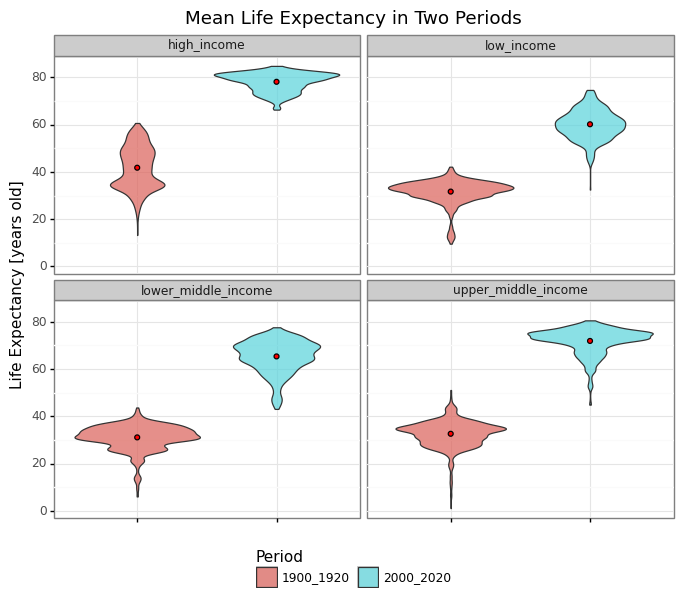

<ggplot: (169475524708)>

In [250]:
# Use the most appropriate plot(s) to describe both 2000-2020 and 1900-1920 life expectancy distributions 
# in the features that are significantly contributing to affect life expectancy.

new1=data2.loc[(data2['time'] >= 2000) & (data2['time'] <=2020)].copy()
new1['cat']='2000_2020'

new2=data2.loc[(data2['time'] >= 1900) & (data2['time'] <=1920)].copy()
new2['cat']='1900_1920'

fr=[new1, new2]
together=pd.concat(fr)

ggplot(together, aes(x='cat', y='life_expectancy_at_birth', fill='cat')) + theme_bw() +\
    geom_violin(alpha=0.7) +\
    stat_summary(fun_y = np.mean, geom = 'point', fill = 'red')+ facet_wrap('~income_groups') +\
    theme(figure_size = (8, 6), legend_position="bottom", axis_text_x=element_blank())+ \
    labs(fill='Period', y='Life Expectancy [years old]', x='', title='Mean Life Expectancy in Two Periods')+ \
    guides(colour=guide_legend(nrow=1, override_aes={"size": 1.2}))

In [47]:
## TASK 2

# Find which countries have a different ratio between males and females of the ages 25-29 in 2010 vs 1950.

# Note: in the 5-year age group dataset there are not only countries but also broader regions, therefore focus 
# only on countries (as found in the "geo to country name" file)
# Note: the unit of measure is 1000 individuals, do not transform it to run the statistical test

import pandas as pd
#populi=pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
populi=pd.read_csv('WPP2019_TotalPopulationBySex.csv')

#age=pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv')
age=pd.read_csv('WPP2019_PopulationByAgeSex_Medium.csv')
age['ratio']=age['PopMale']/age['PopFemale']
y=age[(age.Time==2010)|(age.Time==1950)]
y1=y[(y.AgeGrp== '25-29')]

country=pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--entities--geo.csv")
country.rename({"name":"Location"}, axis=1, inplace=True) # rename the column name
population=pd.merge(country, y1, on=['Location']) 

population.describe()

,LocID,VarID,Time,MidPeriod,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,ratio
count,316.000000,316.0,316.000000,316.000000,316.0,316.0,316.000000,316.000000,316.000000,316.000000
mean,418.158228,2.0,1980.000000,1980.500000,25.0,5.0,1034.852690,1000.780804,2035.633494,1.023902
std,254.048702,0.0,30.047581,30.047581,0.0,0.0,4634.698256,4304.273084,8937.545488,0.285321
min,4.000000,2.0,1950.000000,1950.500000,25.0,5.0,0.932000,0.897000,1.829000,0.630069
25%,204.000000,2.0,1950.000000,1950.500000,25.0,5.0,49.059750,46.336000,96.834000,0.959512
50%,418.000000,2.0,1980.000000,1980.500000,25.0,5.0,179.448500,169.610500,361.551500,1.003532
75%,626.000000,2.0,2010.000000,2010.500000,25.0,5.0,553.373500,561.771000,1115.095750,1.037101
max,894.000000,2.0,2010.000000,2010.500000,25.0,5.0,55749.491000,50548.934000,106298.425000,4.349412


In [62]:
# Which statistical test do you use?
# Two sample t-test

# Formulate the null and alternate hypothesis.
# H0: both mean ratios in 2010 and 1950 are equal
# H1:Two means are different (two-tailed or two-sided) or: Mean in 2010 is either greater or lesser than in 1950 (one tailed)

# Define the significance threshold.
alpha = 0.05

# What is the interpretation of the test results?
from bioinfokit.analys import stat

res = stat()
res.ttest(df=population, xfac='Time', res='ratio', test_type=2)
print(res.summary)

# The p value obtained from the t-test is significant (p < 0.05), and therefore, we conclude that the mean ratio in 2010 
# is significantly different than the mean ratio of male to female in 1950.

# Select countries that have ratio higher than the mean in 2010
sel=population[(population.ratio>=1.0641)]
print(sel)


Two sample t-test with equal variance

------------------  ------------
Mean diff            -0.0803977
t                    -2.52581
Std Error             0.0318305
df                  314
P-value (one-tail)    0.00601741
P-value (two-tail)    0.0120348
Lower 95.0%          -0.143026
Upper 95.0%          -0.0177697
------------------  ------------

Parameter estimates

  Level    Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
   1950       158  0.983703   0.175035    0.0139251       0.956199        1.01121
   2010       158  1.0641     0.359785    0.0286229       1.00757         1.12064



,geo,Location,LocID,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,ratio
0,afg,Afghanistan,4,2,Medium,1950,1950.5,25-29,25,5,321.311,272.299,593.610,1.179993
22,bhr,Bahrain,48,2,Medium,1950,1950.5,25-29,25,5,5.974,4.096,10.070,1.458496
23,bhr,Bahrain,48,2,Medium,2010,2010.5,25-29,25,5,123.053,56.969,180.022,2.159999
24,bgd,Bangladesh,50,2,Medium,1950,1950.5,25-29,25,5,1486.994,1377.365,2864.359,1.079593
37,btn,Bhutan,64,2,Medium,2010,2010.5,25-29,25,5,34.935,29.468,64.403,1.185523
45,bgr,Bulgaria,100,2,Medium,2010,2010.5,25-29,25,5,256.765,236.007,492.772,1.087955
46,bfa,Burkina Faso,854,2,Medium,1950,1950.5,25-29,25,5,180.508,165.960,346.468,1.087660
62,chn,China,156,2,Medium,1950,1950.5,25-29,25,5,21732.884,19977.100,41709.984,1.087890
75,cyp,Cyprus,196,2,Medium,2010,2010.5,25-29,25,5,50.763,44.624,95.387,1.137572
89,gnq,Equatorial Guinea,226,2,Medium,2010,2010.5,25-29,25,5,59.050,39.885,98.935,1.480506


C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\RoksolanaPetrovska\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


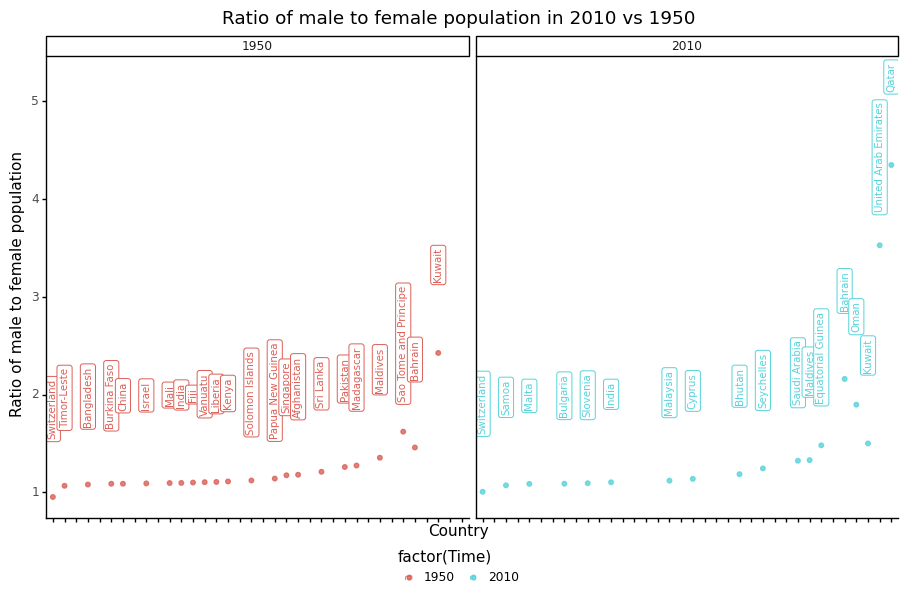

<ggplot: (169475516555)>

In [124]:
# Plot in the most appropriate way the age distribution of males vs females in these countries (plus Switzerland) in 2010 vs 1950.
sel_helvetia=population[(population.Location=='Switzerland')]

frame = [sel, sel_helvetia]
fin=pd.concat(frame)

allig=fin['ratio']+1
ggplot(fin, aes(x='reorder(Location, ratio)', y='ratio', color='factor(Time)', label='Location')) + theme_classic() +\
    facet_wrap(['Time']) + geom_label(angle=90, size=7.4, va='center', ha='center', nudge_y=0.9, position='identity') +\
    geom_point(size=1.4, alpha=0.8) + theme(figure_size = (11, 6), legend_position='bottom', axis_text_x=element_blank()) +\
    labs(x='Country', y='Ratio of male to female population', title='Ratio of male to female population in 2010 vs 1950')


geo to country name



```
https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--entities--geo.csv
```



country classifications

* Landlocked or costline (landlocked)
* Latitude (latitude)
* Longitude (longitude)
* Religion (main_religion_2008)
* Country belongs to the UN (un_state)
* Income group (income_groups)


```
https://raw.githubusercontent.com/open-numbers/ddf--open_numbers--world_development_indicators/master/ddf--entities--geo--country.csv
```



Total population by sex, annually from 1950 to 2100.
* PopMale: Total male population (thousands)
* PopFemale: Total female population (thousands)
* PopTotal: Total population, both sexes (thousands)
* PopDensity: Population per square kilometre (thousands)



```
https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv
```



Population by 5-year age groups.
* PopMale: Male population in the age group (thousands)
* PopFemale: Female population in the age group (thousands)
* PopTotal: Total population in the age group (thousands)
* AgeGrp (string): label identifying the single age (e.g. 15) or age group (e.g. 15-19)
* AgeGrpStart (numeric): initial age of the age group
* AgeGrpSpan (numeric): length of the age group, in years




```
https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv
```



# Instructions

* Always use x and y labels, units of measure and titles in your plots.
* Make sure that every data in the plot is distinguishable.

* The text answers can be either as comments in code-blocks, or in separate text-blocks (preferred for readability).

* Make sure the code runs without errors and gives consistent output: restart the notebook and rerun all the cells to make sure it will work consistently before turning in

* When you are finished you have to options:

  1.   give me access to a private repository on GitHub where you add the midterm
  2.   send me an .ipynb (make sure you write your name on the file name)





# Task 1


### Visualize life-expectancy
* Plot life expectancy from 1900 until 2020 in Sustainable Development Goal (SDG) regions (or 'un_sdg_region'). Countries and areas are grouped into eight Sustainable Development Goal (SDG) regions as defined by the United Nations Statistics Division and used for The Sustainable Development Goals Report (https://unstats.un.org/sdgs/indicators/regional-groups/). --> Compute and plot the *mean* life-expectancy in each region from 1900 until 2020


* Pick a region of your chosing (not Australia + New Zealand!), and plot the life-expectancy of all the countries in that region from 1900 to 2020. If the plot is too crowded, you can split the countries alphabetically (or in any other order) in 2+ plots. 

### Countries with the highest and lowest life-expectancy

Find and plot life expectancy from 1900 until 2020 of the 5 countries that have the highest and lowest mean life expectancy in 2000-2020.

### Which factors contribute to life-expectancy?


* Which of the following factors significantly contribute to 2000-2020 mean life expectancy?
  *   Landlocked vs coastline
  *   Being a high-upper/middle income country vs lower/middle-low income country
  *   Being in the Northern emisphere vs Southern emisphere 
  *   Longitude

  *   Being a christian country vs a country of other religions
  * Being a UN state or not

* Define the significance threshold.
* Which test are you using?
* What is the interpretation of the test results?


* What is the contribution of these factors to mean life expectancy in 1900-1920?


* Use the most appropriate plot(s) to describe both 2000-2020 and 1900-1920 life expectancy distributions in the features that are significantly contributing to affect life expectancy.



# Task 2

### Ratio female-male population
 

*   Find which countries have a different ratio between males and females of the ages 25-29 in 2010 vs 1950. 
  * Note: in the 5-year age group dataset there are not only countries but also broader regions, therefore focus only on countries (as found in the "geo to country name" file)
  * Note: the unit of measure is 1000 individuals, do not transform it to run the statistical test
* Which statistical test do you use?
* Formulate the null and alternate hypothesis.

* Define the significance threshold.
* What is the interpretation of the test results?

* Plot in the most appropriate way the age distribution of males vs females in these countries (plus Switzerland) in 2010 vs 1950.



### Note:

Since you will be performing multiple statistical tests (one per each nation), you have to adjust the significance threshold of your p-value to avoid false positives (for over 100 test, 20% of p-values will be less than 0.05, by definition, but it does not mean that the comparison you are measuring is significantly different!). This is called multiple testing correction. In practice, divide the significance threshold originally set by the number of tests that, and that is the multiple testing corrected significance threshold.